In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load the files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Get number of observations for test and train
print([len(x) for x in [train_df, test_df]])

[891, 418]


In [6]:
# Combine it into one large file for data exploration and cleaning
combined_df = pd.concat([train_df, test_df])

# EDA

In [7]:
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

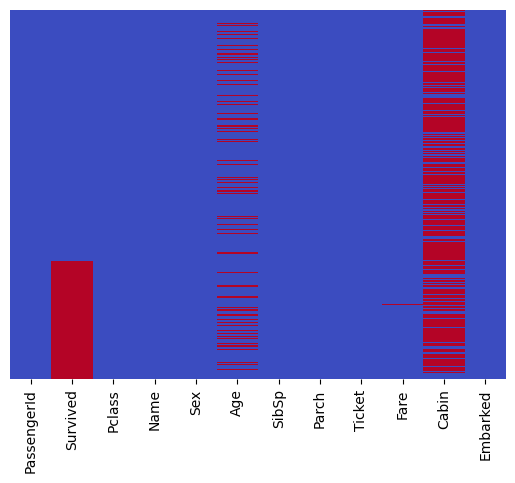

In [8]:
sns.heatmap(combined_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [9]:
# new feature
combined_df['Died'] = 1 - combined_df['Survived']

<Axes: xlabel='Sex'>

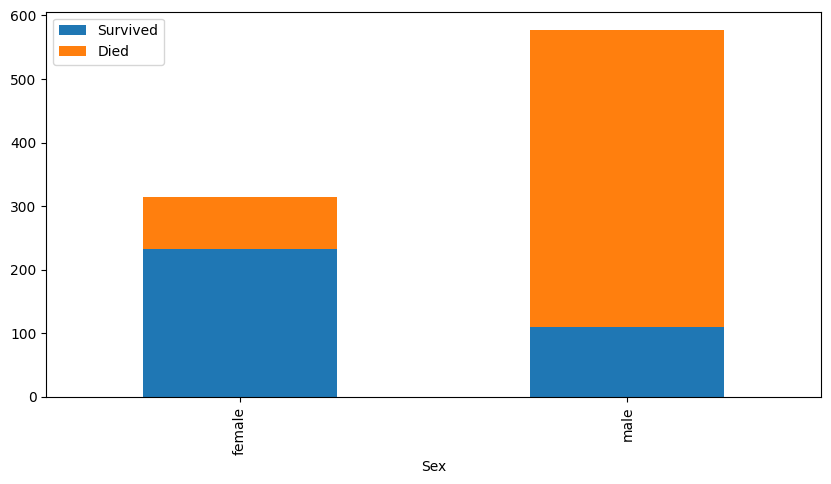

In [10]:
# Does age determine survivor? female has a higher probability of survival

combined_df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), stacked=True)

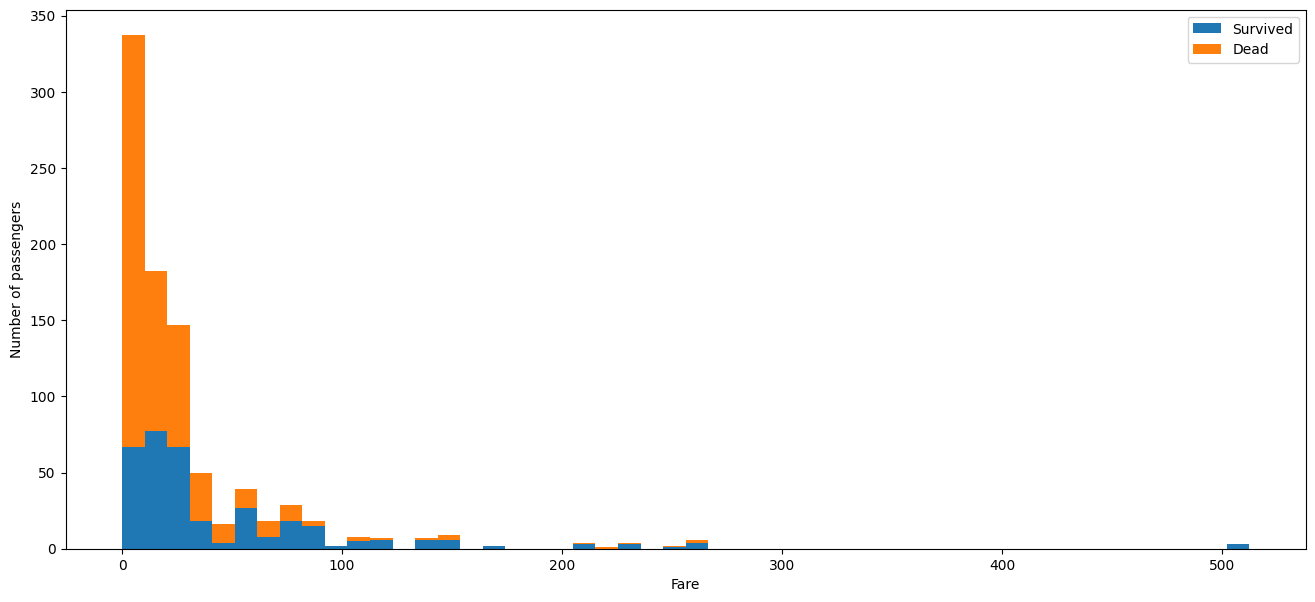

In [11]:
# Does fare determine survivor? >$50 have a higher probability of survival

figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Fare'], combined_df[combined_df['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

<Axes: xlabel='Pclass'>

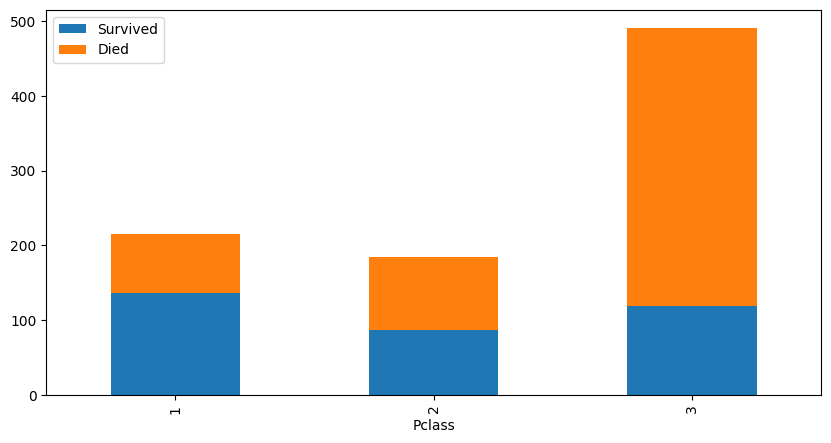

In [12]:
# Does class determine survivor? Class 3 more likely to die

combined_df.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), stacked=True)

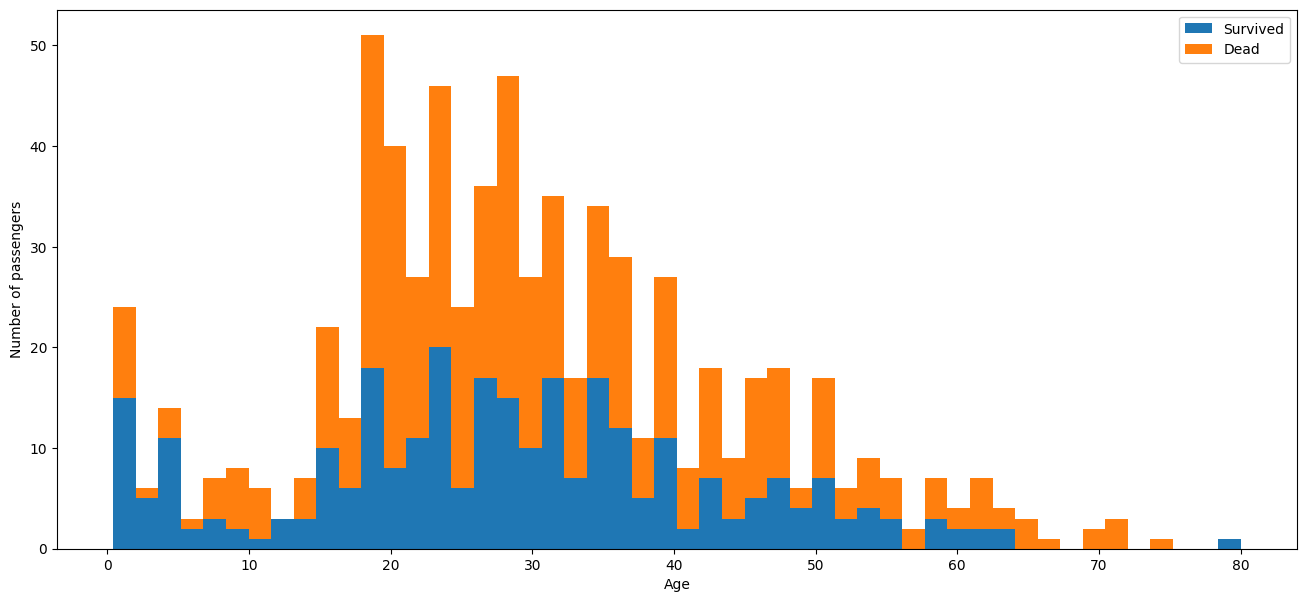

In [13]:
# Does age determine survivor? Younger kids has high chance of survivor

figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Age'], combined_df[combined_df['Survived'] == 0]['Age']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

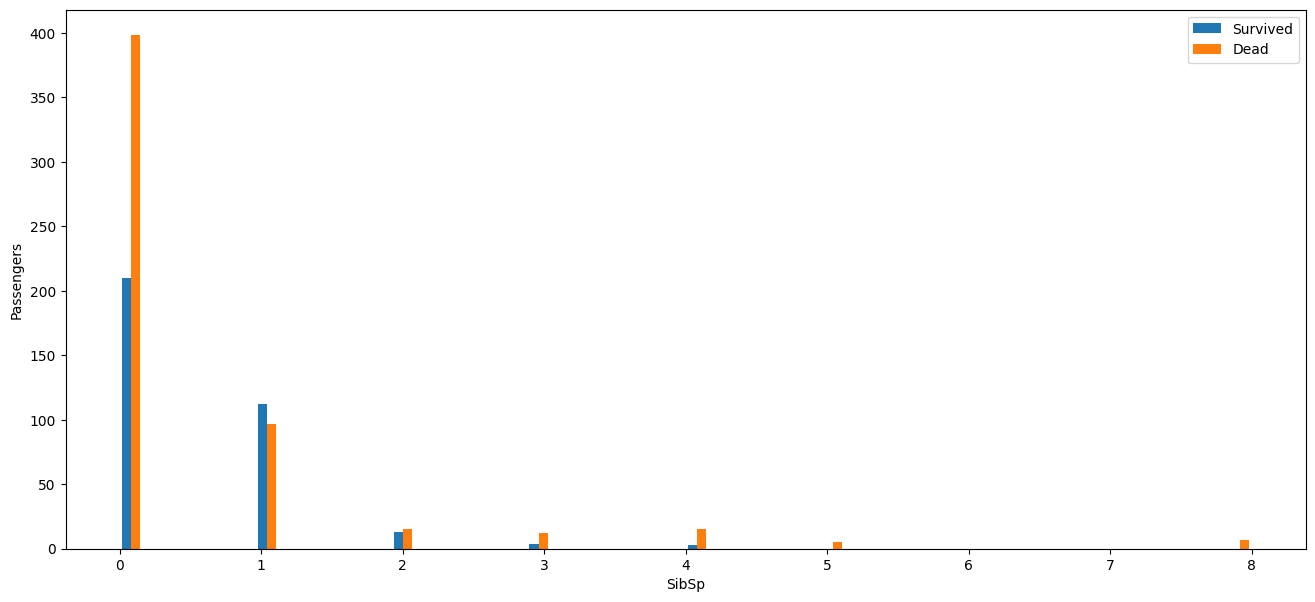

In [14]:
# Does having siblings determine survivor? Families seems to have a bigger chance to survive

figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['SibSp'], combined_df[combined_df['Survived'] == 0]['SibSp']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('SibSp')
plt.ylabel('Passengers')
plt.legend()

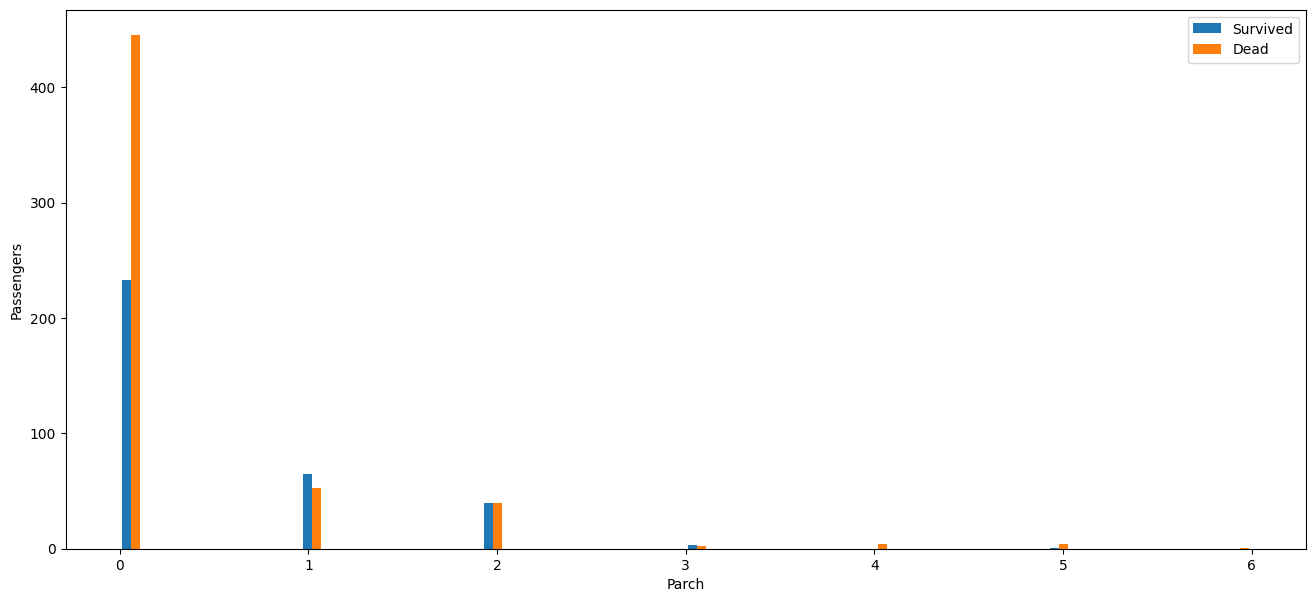

In [15]:
# Does having parents / child determine survivor? Families seems to have a bigger chance to survive

figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Parch'], combined_df[combined_df['Survived'] == 0]['Parch']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Parch')
plt.ylabel('Passengers')
plt.legend()

In [16]:
# title in name might be of importance
# first split at the , take the 2nd element
# second split at the . take the 1st element
titles = set()
for name in combined_df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Col', 'Lady', 'Miss', 'Mme', 'Capt', 'the Countess', 'Jonkheer', 'Ms', 'Master', 'Mr', 'Major', 'Sir', 'Dona', 'Mlle', 'Don', 'Dr', 'Mrs', 'Rev'}


In [17]:
# map Function:
#   combined_df['Name'].map(...): The map function applies a given function to each element in a Series (in this case, the 'Name' column of combined_df). 
#   The function definition is provided within the parentheses.

# Lambda Function:
#   lambda name: ...: This defines an anonymous function (lambda function) that takes a single argument named name. 
#   The lambda function itself performs the string manipulation to extract the title.

combined_df['Title'] = combined_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
#combined_df['Title'] = combined_df.Title.map(Title_Dictionary)
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,Mr


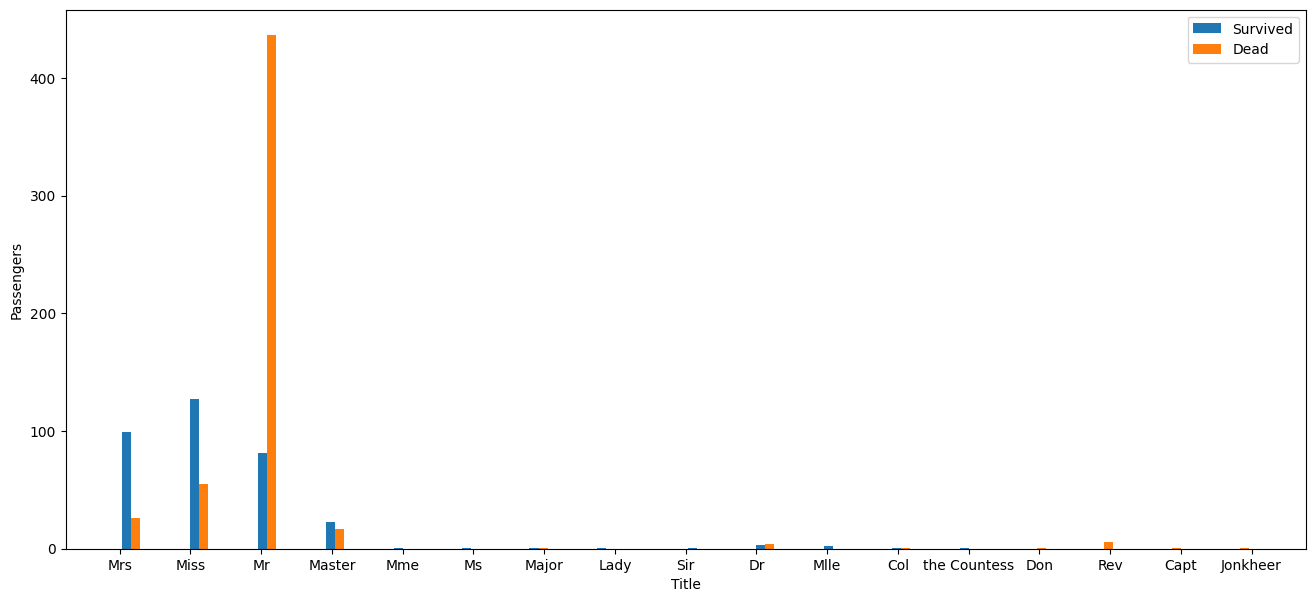

In [18]:
figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Title'], combined_df[combined_df['Survived'] == 0]['Title']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Title')
plt.ylabel('Passengers')
plt.legend()

In [19]:
# Reduce the title to significant groups. Eg. Ms, Miss and Mrs will be common lady

Title_Dictionary = {"Capt": "upper_class",
                    "Col": "upper_class",
                    "Major": "upper_class",
                    "Jonkheer": "upper_class",
                    "Don": "upper_class",
                    "Sir" : "upper_class",
                    "Dr": "upper_class",
                    "Rev": "upper_class",
                    "the Countess":"upper_class",
                    "Mme": "common_woman",
                    "Mlle": "common_woman",
                    "Ms": "common_woman",
                    "Mr" : "common_man",
                    "Mrs" : "common_woman",
                    "Miss" : "common_woman",
                    "Master" : "upper_class",
                    "Lady" : "upper_class"}
combined_df['Title']=combined_df['Title'].map(Title_Dictionary)


In [20]:
combined_df.Title.value_counts()

Title
common_man      757
common_woman    462
upper_class      89
Name: count, dtype: int64

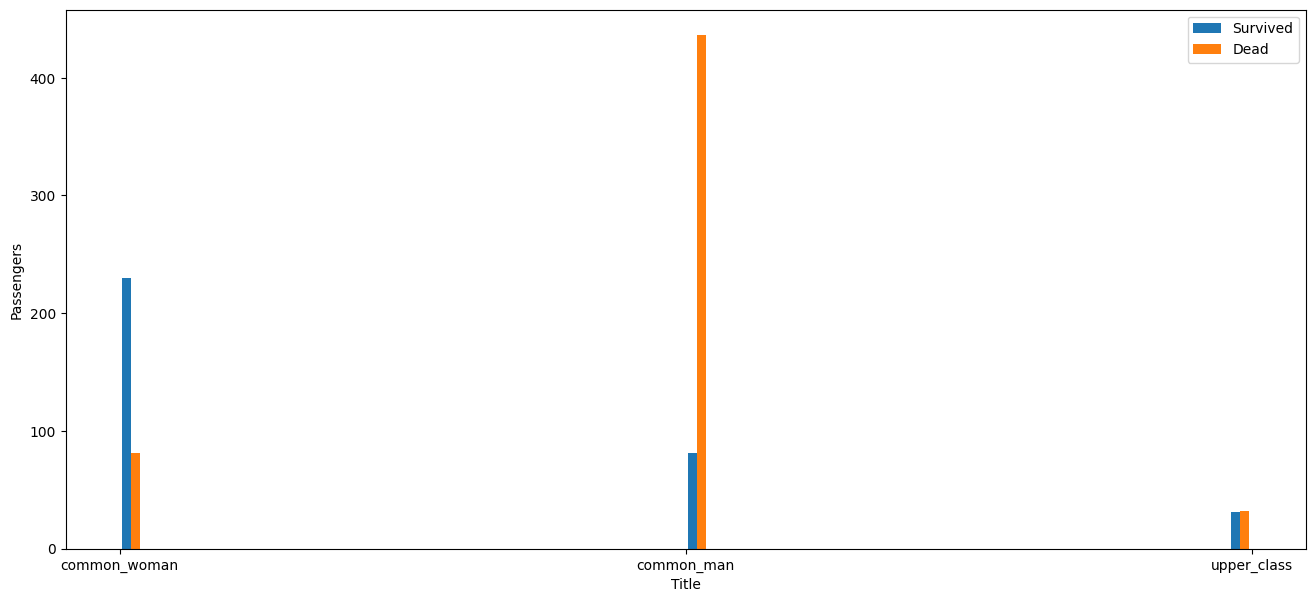

In [21]:
figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Title'], combined_df[combined_df['Survived'] == 0]['Title']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Title')
plt.ylabel('Passengers')
plt.legend()

In [22]:
# Creating a new feature: Family Size. 
combined_df['fam_size']=combined_df['Parch']+combined_df['SibSp']+1

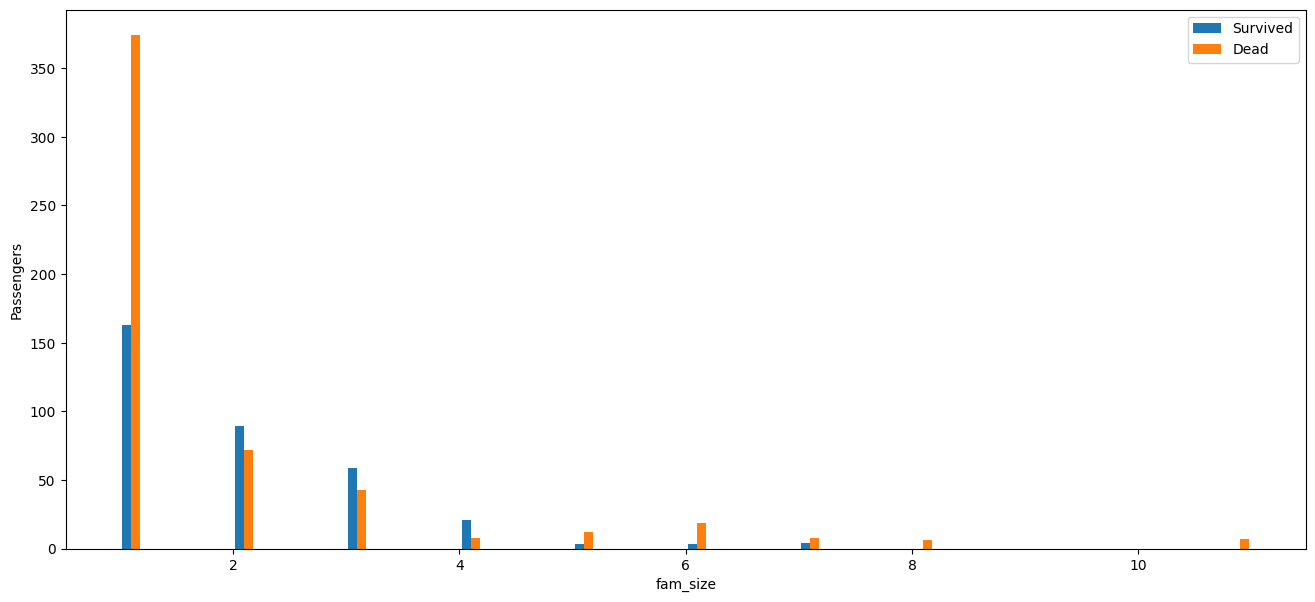

In [23]:
figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['fam_size'], combined_df[combined_df['Survived'] == 0]['fam_size']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('fam_size')
plt.ylabel('Passengers')
plt.legend()

# Clean the data (Null value data: Age, Fare & Cabin?)

In [24]:
# dropping umwanted columns
df1=combined_df.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,fam_size
0,0.0,3,male,22.0,1,0,7.2500,S,common_man,2
1,1.0,1,female,38.0,1,0,71.2833,C,common_woman,2
2,1.0,3,female,26.0,0,0,7.9250,S,common_woman,1
3,1.0,1,female,35.0,1,0,53.1000,S,common_woman,2
4,0.0,3,male,35.0,0,0,8.0500,S,common_man,1


In [25]:
# filling in the age with the median group by Sex
df1["Age"] = df1["Age"].fillna(df1.groupby("Sex")["Age"].transform('median'))

In [26]:
df1["Age"] = df1["Age"].fillna(df1.groupby("Sex")["Age"].transform('median'))

In [27]:
df1.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      2
Title         1
fam_size      0
dtype: int64

In [32]:
df1["Fare"] = df1["Fare"].fillna(df1.groupby("Pclass")["Fare"].transform('median'))

In [33]:
df1.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         1
fam_size      0
dtype: int64

In [35]:
df1["Embarked"] = df1["Embarked"].fillna(df1.groupby("Pclass")["Embarked"].transform(lambda x: x.fillna(x.mode()[0])))
df1["Title"] = df1["Title"].fillna(df1.groupby("Pclass")["Title"].transform(lambda x: x.fillna(x.mode()[0])))

<Axes: >

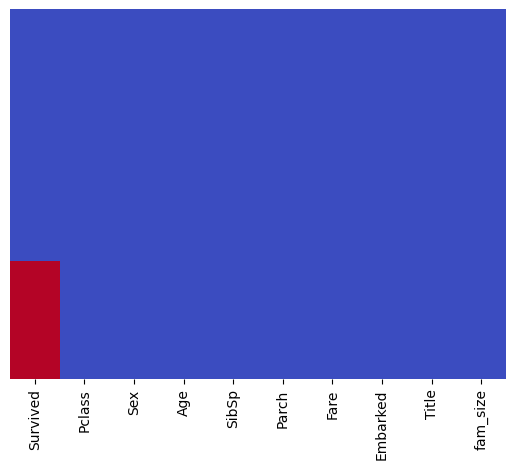

In [36]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [37]:
# convert categorical feature
df2 = pd.get_dummies(df1)

<Axes: >

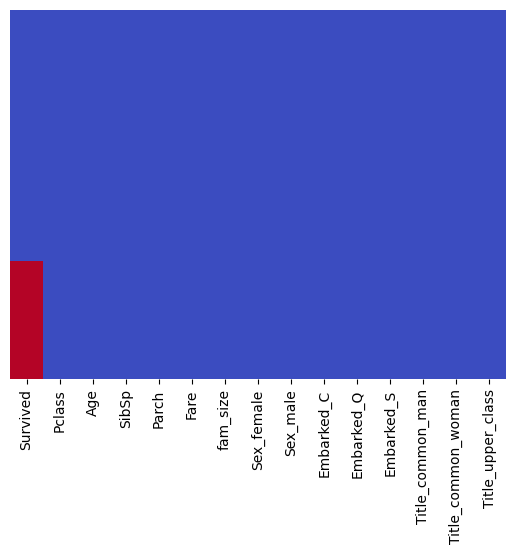

In [39]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Split Dataset

In [43]:
# Split the data set so to build our model
train_df = df2[df2["Survived"].notna()]
test_df = df2[df2["Survived"].isna()]
test_df = test_df.drop(["Survived"], axis = 1)

# Create the X and y sets
X_train_df = train_df.drop(["Survived"], axis = 1)
y_train_df = train_df["Survived"]

In [44]:
train_df.isnull().sum()

Survived              0
Pclass                0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
fam_size              0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Title_common_man      0
Title_common_woman    0
Title_upper_class     0
dtype: int64

In [45]:
test_df.isnull().sum()

Pclass                0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
fam_size              0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Title_common_man      0
Title_common_woman    0
Title_upper_class     0
dtype: int64